<a href="https://colab.research.google.com/github/Dain777666/ESAA_25-2/blob/main/OB_WEEK11_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 딥러닝 시작

## 4.1 인공 신경망의 한계와 딥러닝 출현

< 퍼셉트론 >

- 입력층, 출력층, 가중치로 구성된 구조

- AND 게이트: 모든 입력이 '1'일때 작동함

- OR 게이트: 입력에서 하나만 '1'이라도 작동함

- XOR 게이트: 입력 두 개 중 하나만 '1'일때 작동함 -> 데이터가 비선형적으로 분리되기 때문에 제대로 된 분류가 어려움

-  즉, 단층 퍼셉트론에서는 AND, OR 연산에 대해서는 학습이 가능하지만 XOR에 대해서는 학습이 불가능함 -> 다층 퍼셉트론 고안

< DNN >

-  입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망, 딥러닝이라고도 부름



## 4.2 딥러닝 구조

< 딥러닝 용어 >

- 은닉층: 모든 입력 노드부터 입력 값을 받아 가중합을 계산하고, 이 값을 활성화 함수에 적용하여 출력층에 전달하는 층

- 가중치: 입력 값의 연산 결과를 조정하는 역할

- 활성화 함수: 전달 함수에서 전달받은 값을 출력
할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수

  - 소프트맥스 함수: 입력 값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함

  - 답러닝에서 출력 노드의 활성화함수로 많이 사용됨

- 손실 함수: 평균 제곱 오차(MSE)와 크로스 엔트로피 오차(CEE)가 있음

< 딥러닝 학습 >

- 순전파와 역전파로 나뉨

 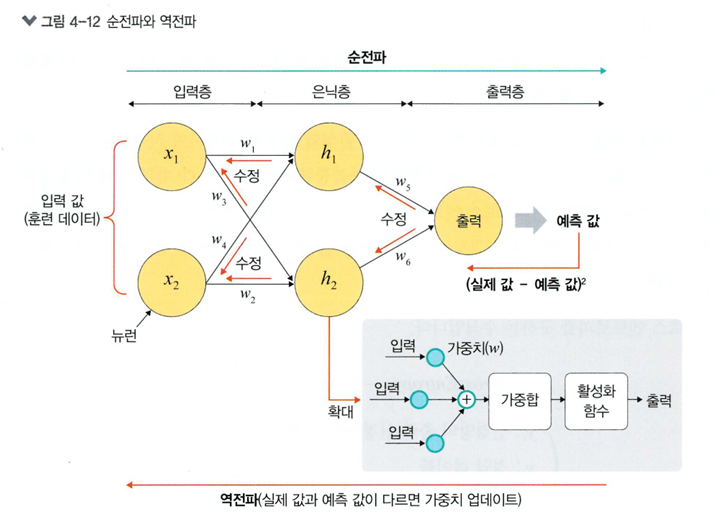





In [ ]:
import torch
import torch.nn as nn

class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.relu = torch.nn.ReLu(inplace = True)
    self.out = torch.nn.Linear(n_hidden, n_output)
    self.softmax = torch.nn.Softmax(dim = n_output)
  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x)
    x = self.out(x)
    x = self.softmax(x)
    return x

In [ ]:
# loss_fn = torch.nn.MSELoss(reduction='sum')
# y_pred = model(x)
# loss = loss_fn(y_pred, y)

In [ ]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(5, 6, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

In [ ]:
# class DropoutModel(torch.nn.Module):
#   def __init__(self):
#     super(DropoutModel, self).__init__()
#     self.layer1 = torch.nn.Linear(784, 1200)
#     self.dropout1 = torch.nn.Dropout(0.5)
#     self.layer2 = torch.nn.Linear(1200, 1200)
#     self.dropout2 = torch.nn.Dropout(0.5)
#     self.layer3 = torch.nn.Linear(1200, 10)

#   def forward(self, x):
#     x = F.relu(self.layer1(x))
#     x = self.dropout1(x)
#     x = F.relu(self.layer2(x))
#     x = self.dropout2(x)
#     return self.layer3(x)

< 경사 하강법 >

1. 배치 경사 하강법: 전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법 -> 시간 오래걸림

2. 확률적 경사 하강법: 임의로 선택한 데이터에 대해 기울기를 계산하는 방법 -> 빠른 계산 가능

3. 미니 배치 경사 하강법: 전체 데이터셋을 미니 배치 여러 개로 나누고，미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해서 학습하는 방법 -> 빠르고 안정적인 편

In [ ]:
# class CustomDataset(Dataset):
#   self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
#   self.y_data = [[12],[18],[11]]

#   def __len__(self):
#     return len(self.x_data)

#   def __getitem__(self, idx):
#     x = torch.FloatTensor(self.x_data[idx])
#     y = torch.FloatTensor(self.y_data[idx])
#     return x, y

# dataset = CustomDataset()
# dataloader = DataLoader(
#     dataset,
#     batch_size = 2,
#     shuffle = True
# )

## 4.3 딥러닝 알고리즘

1. DNN: 다수의 은닉층을 두었기 때문에 다양한 비선형적 관계를 학습할 수 있는 장점이 있지만, 학습을 위한 연산량이 많고 기울기 소멸 문제 등이 발생할 수 있음

2. CNN: 영상 및 사진이 포함된 이미지 데이터에서 객체를 탐색하거나 객체 위치를 찾아내는 데 유용한 신경망

- 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식함

- 필터를 공유 파라미터로 시용하기 때문에 일반 인공 신경망과 비교하여 학습 파라미터가 매우 적음

3. RNN: 시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망

- 기울기 소멸 문제로 학습이 제대로 되지 않는 문제가 있음 -> 메모리 개념을 도입한 LSTM

4. 제한된 볼츠만 머신: 가시층과 은닉층으로 구성된 모델

5. 심층 신뢰 신경망: 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망